In [188]:
import numpy as np
import pandas as pd

In [189]:
df = pd.read_csv('data/combined_dataset.csv')

In [190]:
df.head()

,target,text
0,spam,Congratulations! You've been selected for a lu...
1,spam,URGENT: Your account has been compromised. Cli...
2,spam,You've won a free iPhone! Claim your prize by ...
3,spam,Act now and receive a 50% discount on all purc...
4,spam,Important notice: Your subscription will expir...


Data cleaning

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10961 entries, 0 to 10960
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  10961 non-null  object
 1   text    10961 non-null  object
dtypes: object(2)
memory usage: 171.4+ KB


In [8]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [192]:
df.head()

,target,text
0,spam,Congratulations! You've been selected for a lu...
1,spam,URGENT: Your account has been compromised. Cli...
2,spam,You've won a free iPhone! Claim your prize by ...
3,spam,Act now and receive a 50% discount on all purc...
4,spam,Important notice: Your subscription will expir...


In [10]:
df.rename(columns={'v1':'target','v2':'text'}, inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [193]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [194]:
df['target']=encoder.fit_transform(df['target'])

In [195]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [196]:
df.duplicated().sum()

np.int64(674)

In [197]:
df = df.drop_duplicates(keep='first')

In [198]:
df.duplicated().sum()

np.int64(0)

In [199]:
df.shape

(10287, 2)

EDA

In [200]:
df.target.value_counts()

target
0    8014
1    2273
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x159650c10>,
 [Text(-0.8454495556756214, 0.7037151759113162, 'ham'),
  Text(0.8454496171963551, -0.703715101999763, 'spam')],
 [Text(-0.4611543030957934, 0.3838446414061724, '77.90'),
  Text(0.4611543366525573, -0.3838446010907797, '22.10')])

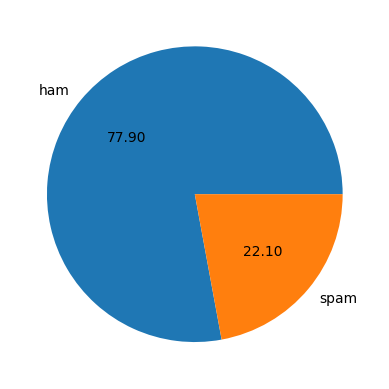

In [201]:
import matplotlib.pyplot as plt

plt.pie(df.target.value_counts(), labels=['ham','spam'], autopct="%0.2f")


imbalanced data

In [202]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tajbirhasanshuvo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [203]:
df['num_char'] = df.text.apply(len)

In [204]:
df

,target,text,num_char
0,1,Congratulations! You've been selected for a lu...,90
1,1,URGENT: Your account has been compromised. Cli...,89
2,1,You've won a free iPhone! Claim your prize by ...,72
3,1,Act now and receive a 50% discount on all purc...,72
4,1,Important notice: Your subscription will expir...,94
...,...,...,...
10956,1,Hey little one! Exciting news! Mama and baby a...,244
10957,1,Amazing DATA deals on your Pulse Plan today! D...,119
10958,1,Special offer just for you! Get 1GB @15 bob va...,116
10959,1,NEW ARRIVAL - JUNE 23RD Dresses @ 300; Kondel...,196


In [205]:
df['num_words'] = df.text.apply(lambda x: len(nltk.word_tokenize(x)))

In [206]:
df.head()

,target,text,num_char,num_words
0,1,Congratulations! You've been selected for a lu...,90,17
1,1,URGENT: Your account has been compromised. Cli...,89,16
2,1,You've won a free iPhone! Claim your prize by ...,72,17
3,1,Act now and receive a 50% discount on all purc...,72,16
4,1,Important notice: Your subscription will expir...,94,16


In [207]:
df['num_sent'] = df.text.apply(lambda x: len(nltk.sent_tokenize(x)))

In [208]:
df.head()

,target,text,num_char,num_words,num_sent
0,1,Congratulations! You've been selected for a lu...,90,17,3
1,1,URGENT: Your account has been compromised. Cli...,89,16,2
2,1,You've won a free iPhone! Claim your prize by ...,72,17,2
3,1,Act now and receive a 50% discount on all purc...,72,16,2
4,1,Important notice: Your subscription will expir...,94,16,2


In [33]:
df[['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [209]:
df[df['target']==0][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,8014.000000,8014.000000,8014.000000
mean,465.523709,109.791490,6.133891
std,1021.944118,247.481892,17.546399
min,2.000000,1.000000,1.000000
25%,47.000000,12.000000,1.000000
50%,103.000000,25.000000,2.000000
75%,418.000000,101.000000,6.000000
max,31851.000000,8861.000000,1204.000000


In [35]:
df[df['target']==1][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [210]:
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

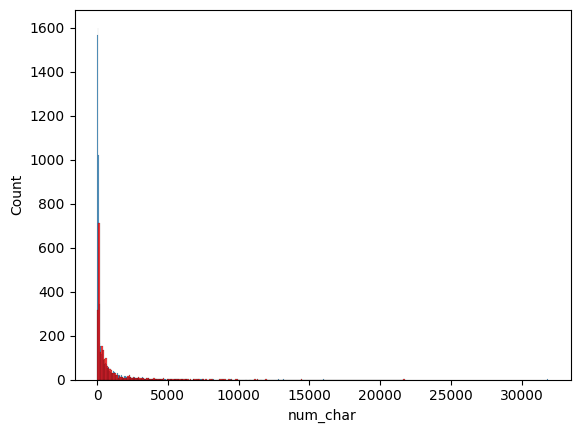

In [211]:
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

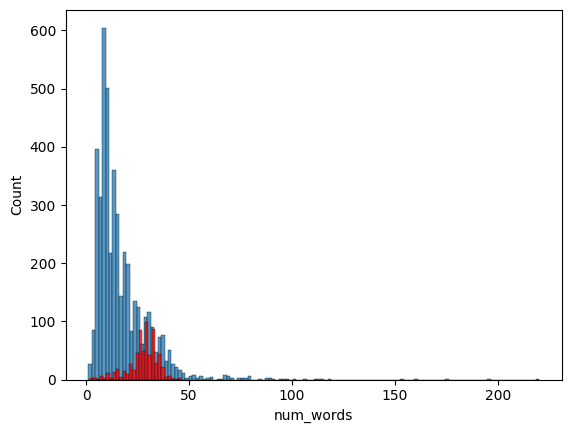

In [40]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color='red')

<Axes: xlabel='num_sent', ylabel='Count'>

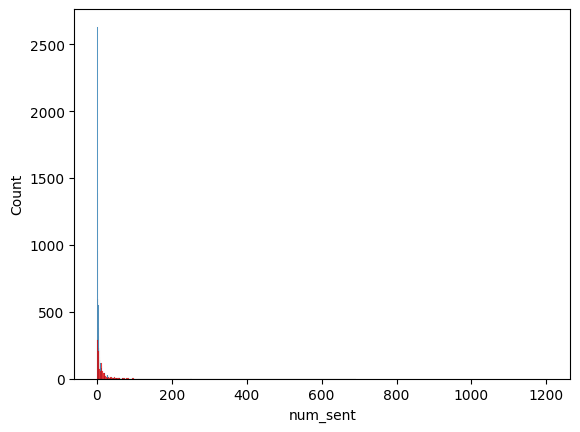

In [212]:
sns.histplot(df[df['target']==0]['num_sent'])
sns.histplot(df[df['target']==1]['num_sent'], color='red')

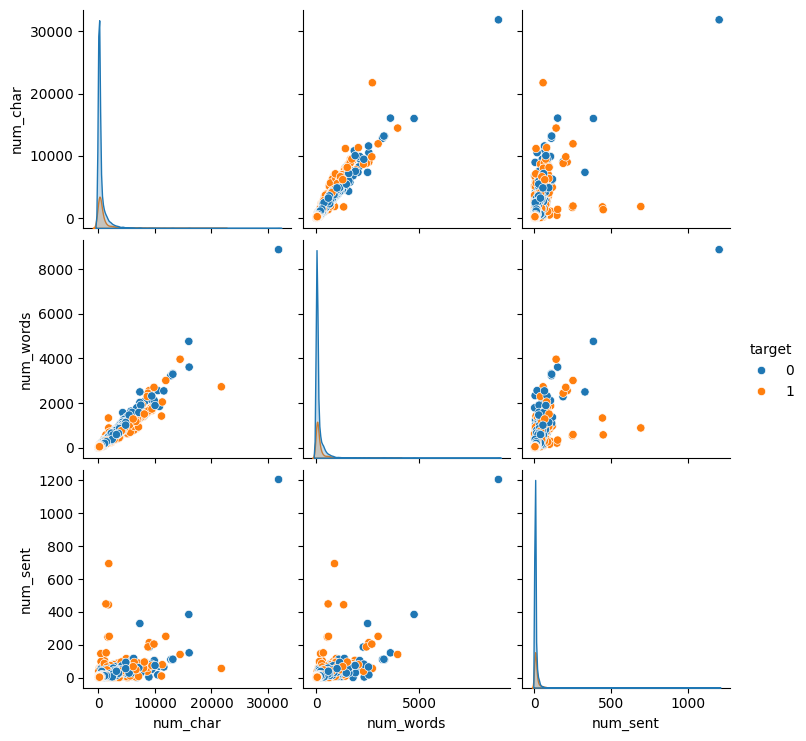

In [213]:
sns.pairplot(df, hue='target')

<Axes: >

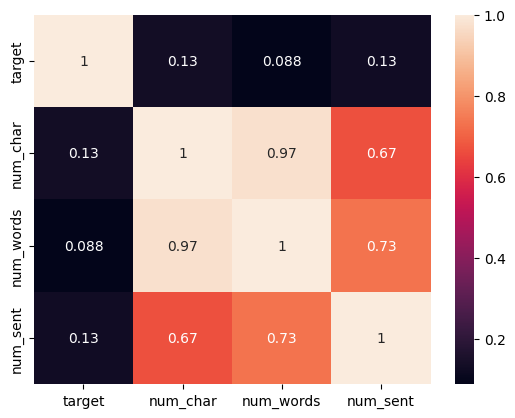

In [214]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

Data preprocessing

In [215]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

def transform(text):
    text = text.lower()
    
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text= y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text= y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    
    return " ".join(y)
    

In [47]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tajbirhasanshuvo/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [216]:
df['transformed_text'] = df['text'].apply(transform)

In [217]:
df.head()

,target,text,num_char,num_words,num_sent,transformed_text
0,1,Congratulations! You've been selected for a lu...,90,17,3,congratul select luxuri vacat getaway claim prize
1,1,URGENT: Your account has been compromised. Cli...,89,16,2,urgent account compromis click reset password ...
2,1,You've won a free iPhone! Claim your prize by ...,72,17,2,free iphon claim prize click link
3,1,Act now and receive a 50% discount on all purc...,72,16,2,act receiv 50 discount purchas limit time offer
4,1,Important notice: Your subscription will expir...,94,16,2,import notic subscript expir soon renew avoid ...


In [54]:
from wordcloud import WordCloud
wc = WordCloud(width=5000, height=5000, min_font_size=10, background_color='white')

In [55]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

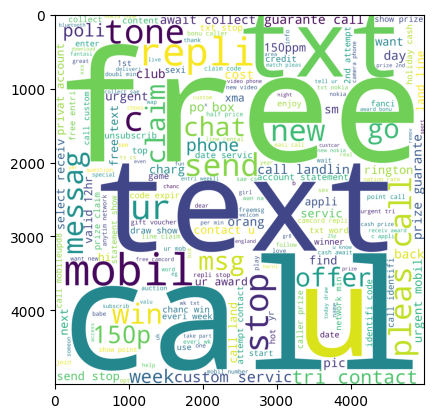

In [56]:
plt.imshow(spam_wc)

In [57]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

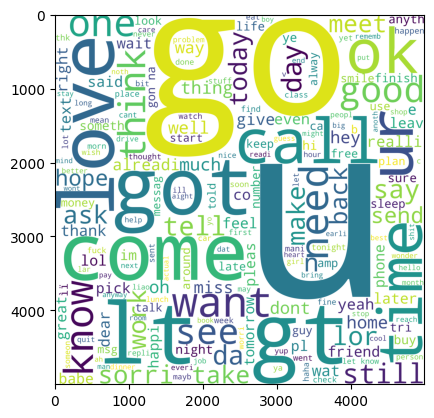

In [58]:
plt.imshow(ham_wc)

In [218]:
spam_corpus= []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)

In [219]:
len(spam_corpus)

208346

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, '3'),
  Text(1, 0, 'http'),
  Text(2, 0, '2'),
  Text(3, 0, 'com'),
  Text(4, 0, 'compani'),
  Text(5, 0, 'price'),
  Text(6, 0, '1'),
  Text(7, 0, '0'),
  Text(8, 0, 'get'),
  Text(9, 0, 'e'),
  Text(10, 0, '4'),
  Text(11, 0, 'www'),
  Text(12, 0, 'inform'),
  Text(13, 0, 'pleas'),
  Text(14, 0, '00'),
  Text(15, 0, 'free'),
  Text(16, 0, '5'),
  Text(17, 0, 'email'),
  Text(18, 0, 'font'),
  Text(19, 0, 'statement'),
  Text(20, 0, 'new'),
  Text(21, 0, 'td'),
  Text(22, 0, 'secur'),
  Text(23, 0, 'call'),
  Text(24, 0, 'us'),
  Text(25, 0, 'time'),
  Text(26, 0, 'stock'),
  Text(27, 0, 'invest'),
  Text(28, 0, 'product'),
  Text(29, 0, '7')])

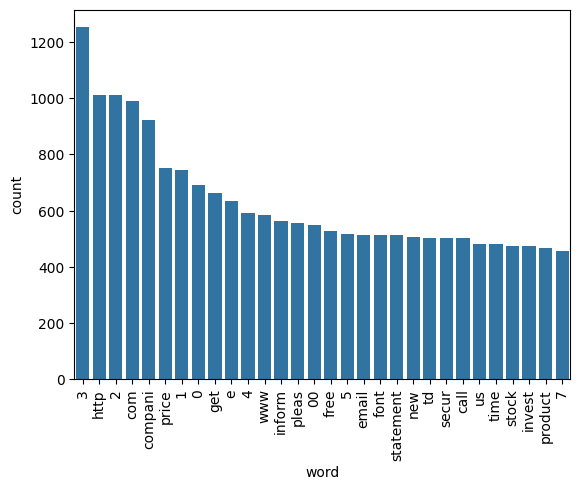

In [220]:
from collections import Counter
top_words_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=top_words_df)
plt.xticks(rotation=90)

In [221]:
ham_corpus= []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)

In [222]:
len(ham_corpus)

410331

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'ect'),
  Text(1, 0, 'hou'),
  Text(2, 0, 'enron'),
  Text(3, 0, '2000'),
  Text(4, 0, 'deal'),
  Text(5, 0, 'ga'),
  Text(6, 0, 'pleas'),
  Text(7, 0, 'meter'),
  Text(8, 0, 'com'),
  Text(9, 0, 'subject'),
  Text(10, 0, 'cc'),
  Text(11, 0, 'pm'),
  Text(12, 0, 'hpl'),
  Text(13, 0, 'thank'),
  Text(14, 0, '1'),
  Text(15, 0, '2001'),
  Text(16, 0, 'need'),
  Text(17, 0, 'daren'),
  Text(18, 0, '000'),
  Text(19, 0, '00'),
  Text(20, 0, '2'),
  Text(21, 0, '10'),
  Text(22, 0, 'corp'),
  Text(23, 0, 'know'),
  Text(24, 0, '01'),
  Text(25, 0, 'volum'),
  Text(26, 0, '3'),
  Text(27, 0, 'forward'),
  Text(28, 0, 'day'),
  Text(29, 0, 'e')])

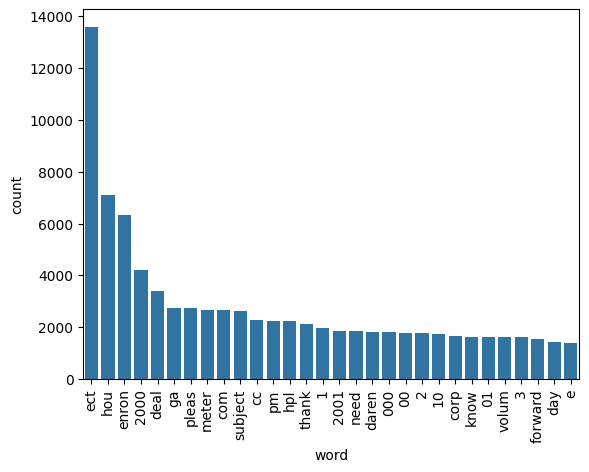

In [223]:
from collections import Counter
top_words_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=top_words_df)
plt.xticks(rotation=90)

Model Building

In [224]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tf =TfidfVectorizer(max_features=3000)

In [225]:
x = cv.fit_transform(df['transformed_text']).toarray()


In [226]:
x =  tf.fit_transform(df['transformed_text']).toarray()

In [227]:
x.shape

(10287, 3000)

In [228]:
y= df['target'].values

In [229]:
from sklearn.model_selection import train_test_split

In [230]:
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [231]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [232]:
gnb= GaussianNB()
mnb= MultinomialNB()
bnb= BernoulliNB()


In [233]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)

In [234]:
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.7439261418853256
[[1107  508]
 [  19  424]]
0.45493562231759654


In [235]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)

In [236]:
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9543245869776482
[[1574   41]
 [  53  390]]
0.9048723897911833


In [237]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)

In [238]:
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.8999028182701652
[[1556   59]
 [ 147  296]]
0.8338028169014085


In [239]:
import pickle

pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))